# 🏨 Hotel Booking Cancellation Analysis

## 📌 Project Objective
To analyze hotel booking data and identify key factors influencing booking cancellations and revenue loss.

## 📊 Dataset Information
- Total Records: 119,390
- Total Features: 32
- Source: Hotel Booking Demand Dataset

## 🛠 Tools & Technologies
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

## 📥 Data Loading

In [7]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 🔍 Data Understanding

In [8]:
df.shape

(119390, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 🧹 Data Cleaning
Handling missing values and preparing dataset for analysis.

In [11]:
df["children"].fillna(0, inplace=True)
df["country"].fillna("Unknown", inplace=True)
df["agent"].fillna(0, inplace=True)
df["company"].fillna(0, inplace=True)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## ⚙ Feature Engineering
Creating new useful features for better analysis.

In [12]:
df["total_stay"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [13]:
cancel_rate = df["is_canceled"].mean() * 100
print(f"Overall Cancellation Rate: {cancel_rate:.2f}%")

Overall Cancellation Rate: 37.04%


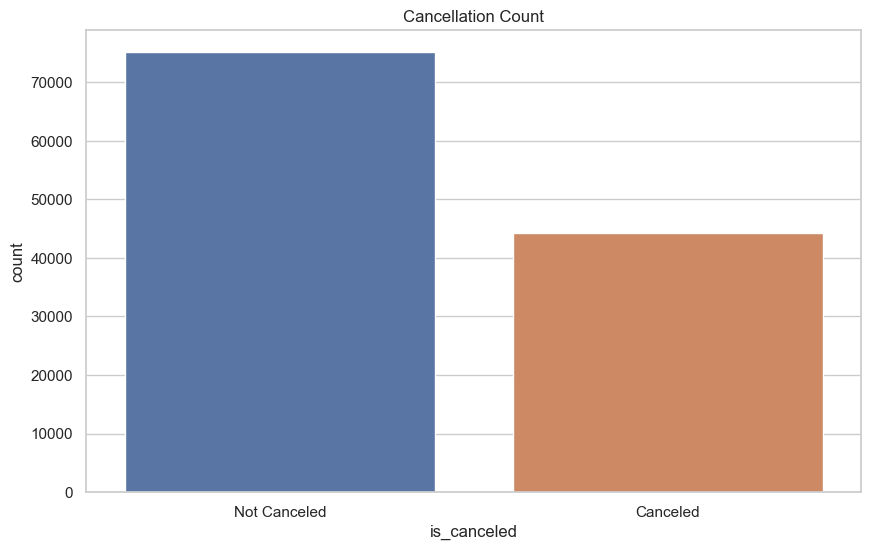

In [14]:
sns.countplot(x="is_canceled", data=df)
plt.title("Cancellation Count")
plt.xticks([0,1], ["Not Canceled", "Canceled"])
plt.show()

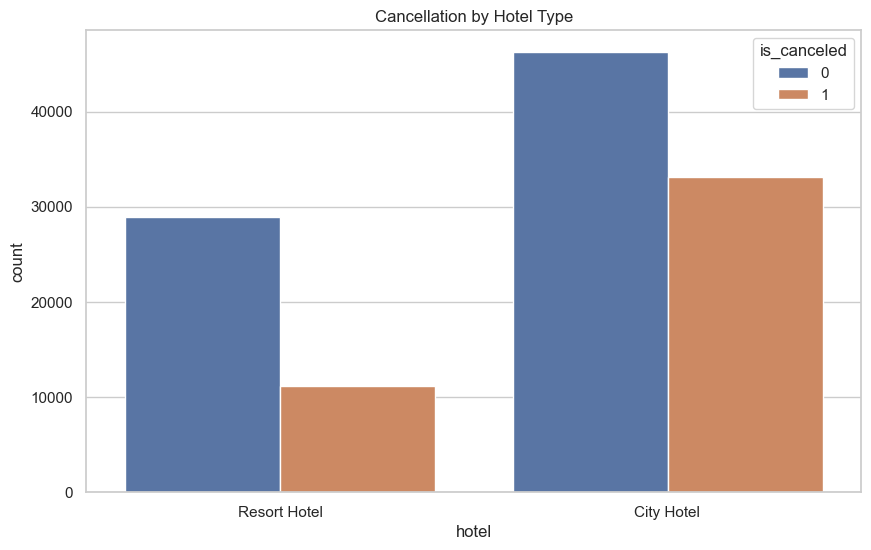

In [15]:
sns.countplot(x="hotel", hue="is_canceled", data=df)
plt.title("Cancellation by Hotel Type")
plt.show()

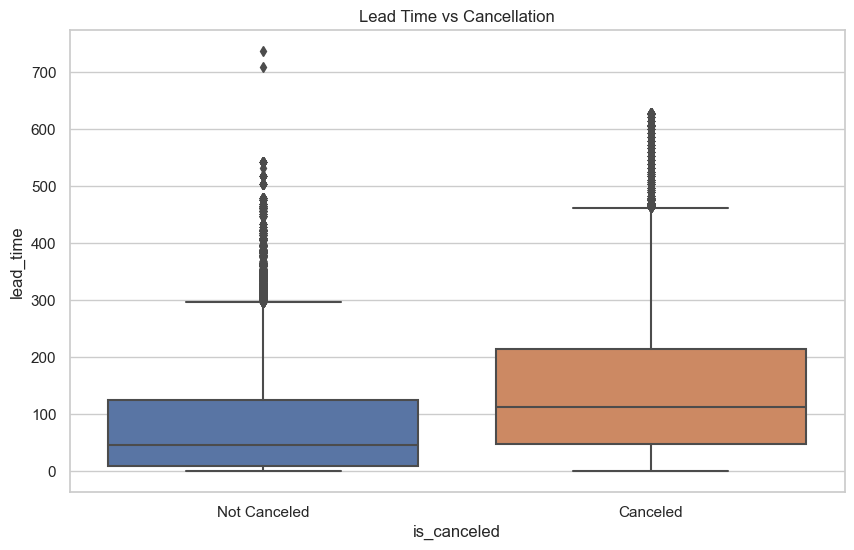

In [16]:
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time vs Cancellation")
plt.xticks([0,1], ["Not Canceled", "Canceled"])
plt.show()

## 💡 Final Insights

1. Overall cancellation rate is approximately 37%.
2. City Hotels experience higher cancellation rates compared to Resort Hotels.
3. Bookings with higher lead time are more likely to be canceled.
4. Cancellation behavior significantly impacts hotel revenue stability.
5. Data-driven strategies can reduce cancellation-related revenue loss.

In [17]:
df.to_csv("cleaned_hotel_bookings.csv", index=False)

In [18]:
import os
os.getcwd()

'C:\\Users\\MOIZ KHAN\\Desktop\\Hotel_booking_analysis'